In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

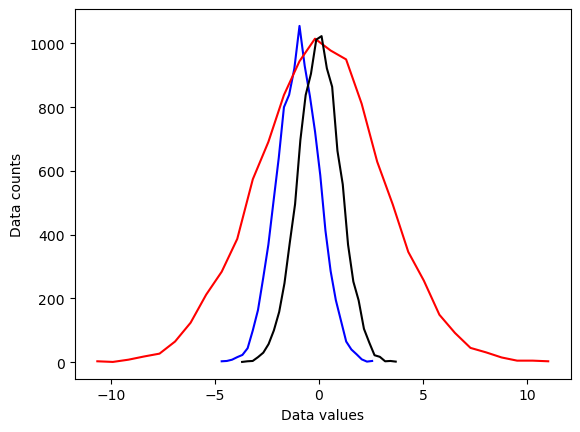

In [2]:
N = 10001
nbins = 30

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N)


y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2

plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [3]:
meanval = 10.2
stdval = 7.5
numsamp = 123

np.random.normal(meanval,stdval,numsamp)

np.random.randn(numsamp)*stdval + meanval

array([ 6.24621025,  7.99554201,  6.34540543,  4.0518476 , 17.04558576,
       -3.40623236,  3.52811402, 10.9027338 , 14.29740824,  7.45175372,
       32.02778187,  4.57622324, 11.17678967,  8.74107244,  3.38206583,
       12.85440771, 11.46349805, 26.76831739, 12.74607078, 11.91405849,
        4.40657246, 16.69393929,  6.18059278, 10.1009502 ,  7.96684513,
       16.32078002,  5.63640207,  7.20834335, 12.32849709,  4.67328595,
       17.62619904, 24.00723153,  4.2344981 , 11.60532543,  9.56864005,
       15.74119726, 18.93568808, 11.03903974,  2.97230683, 17.78367498,
       11.2408786 , 12.25133937, 26.91067098, -0.40667275, -5.33668644,
        9.14094591, 19.36552668,  8.53972686,  9.73894289, 13.02101469,
       10.86796494, -1.6399573 , 13.82942441,  7.04041872, 14.52556656,
        8.04708656,  8.97946513, 22.58047639, 11.86439537, 23.52857018,
       13.94792177, 19.80042031,  9.21368214, 21.05339984,  9.21049237,
        5.8203794 ,  3.92250963,  2.54488663, 16.43425419, -0.83

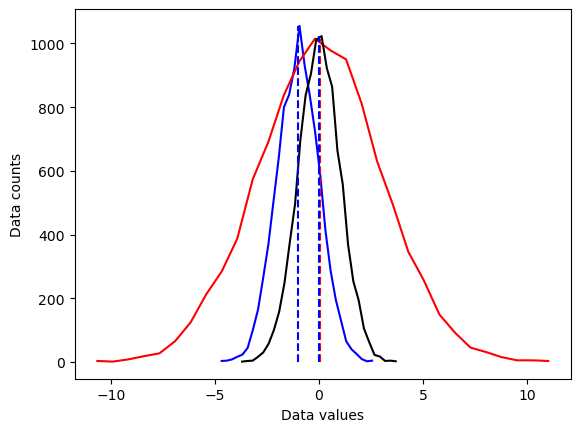

In [4]:
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

plt.plot(x1,y1,'b',x2,y2,'r',x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'b--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

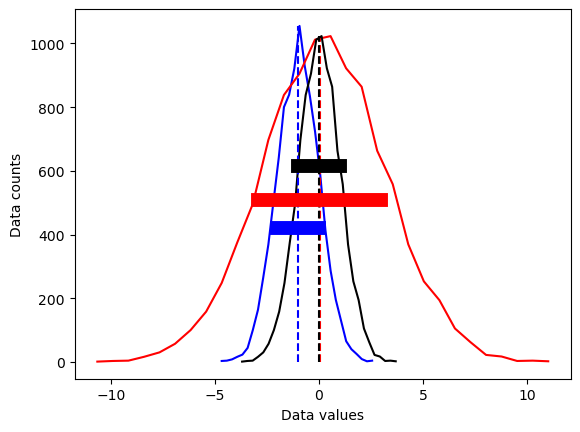

In [9]:
stds = np.zeros(3)

stds[0] = np.std(d1,ddof=1)
stds[1] = np.std(d2,ddof=1)
stds[2] = np.std(d3,ddof=1)

plt.plot(x1,y1,'b', x2, y3, 'r', x3, y3, 'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--',[mean_d2,mean_d2],[0,max(y2)],'r--',[mean_d3,mean_d3],[0,max(y3)],'k--')

plt.plot([mean_d1-stds[0],mean_d1+stds[0]],[.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]],[.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]],[.6*max(y3),.6*max(y3)],'k',linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

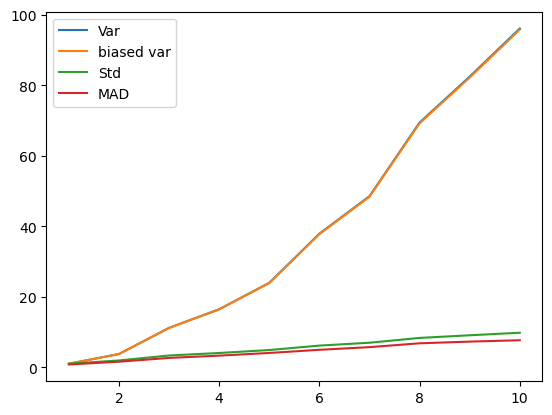

In [17]:
variances = np.arange(1,11)
N = 300

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)):
    
    data = np.random.randn(N) * variances[i]
    datacent = data - np.mean(data)
    
    varmeasures[0,i] = sum(datacent**2) / (N-1)
    
    varmeasures[1,i] = sum(datacent**2) / N
    
    varmeasures[2,i] = np.sqrt(sum(datacent**2) / (N-1))
    
    varmeasures[3,i] = sum(abs(datacent)) / (N-1)

plt.plot(variances,varmeasures.T)
plt.legend(('Var', 'biased var', 'Std', 'MAD'))
plt.show()

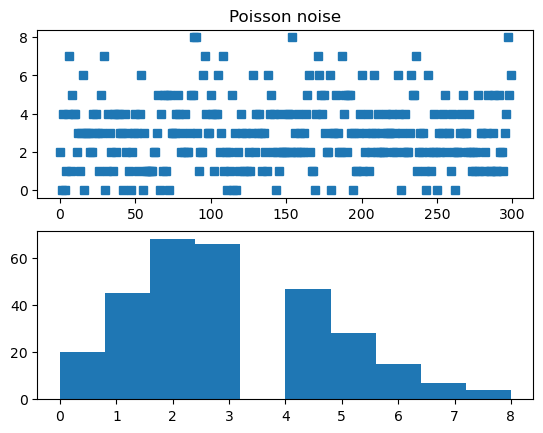

In [18]:
data = np.random.poisson(3,300)

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

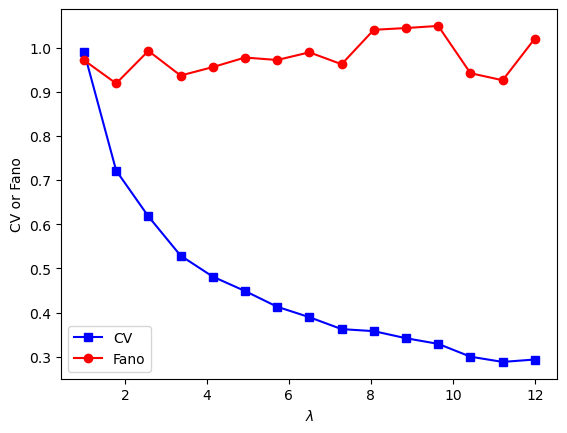

In [22]:
lambdas = np.linspace(1,12,15)

fano = np.zeros(len(lambdas))
cv = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    data = np.random.poisson(lambdas[li],1000)
    
    cv[li] = np.std(data) / np.mean(data)
    fano[li]  = np.var(data) / np.mean(data)
    
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CV','Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()